In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
import pytorch_dataset
import pytorch_datamodule

import matplotlib.pyplot as plt
import pandas as pd

import albumentations as A
from albumentations.pytorch import ToTensorV2

In [57]:
df = pd.read_csv('/Users/user/repos/zoobot-3d/data/gz3d_and_gz_desi_master_catalog.csv')[:100]


In [58]:
df.columns.values

array(['ra_manga', 'dec_manga', 'mangaid', 'iauname', 'ifudesignsize',
       'manga_tileid', 'nsa_id', 'explorer_link',
       'gz_total_classifications', 'gz_bar_votes', 'gz_spiral_votes',
       'sample', 'local_gz3d_fits_loc', 'best_match', 'sky_separation',
       'ra_desi', 'dec_desi', 'brickid', 'objid', 'dr8_id', 'mag_r',
       'mag_g', 'mag_z', 'est_dr5_pixscale', 'galahad_fits_loc',
       'galahad_jpg_loc', 'local_desi_fits_loc', 'local_desi_jpg_loc',
       'local_json_loc', 'local_spiral_mask_loc', 'local_bar_mask_loc'],
      dtype=object)

In [59]:
gz_desi = pd.read_parquet('/Users/user/Downloads/gz_desi_deep_learning_catalog_friendly.parquet',
                          columns=[
                              'dr8_id',
                              'smooth-or-featured_featured-or-disk_fraction',
                              'has-spiral-arms_yes_fraction',
                              'spiral-arm-count_2_fraction'
                            ])

In [60]:
gz_desi = gz_desi[gz_desi['smooth-or-featured_featured-or-disk_fraction'] > 0.5]
gz_desi = gz_desi[gz_desi['has-spiral-arms_yes_fraction'] > 0.5]
gz_desi = gz_desi[gz_desi['spiral-arm-count_2_fraction'] > 0.3]

In [61]:

df = pd.merge(df, gz_desi, on='dr8_id', validate='one_to_one', how='inner')

In [62]:
len(df)

7

In [63]:
transform = A.Compose(
    [
        A.CenterCrop(250, 250)
    ],
    additional_targets={'spiral_mask': 'image', 'bar_mask': 'image'}
)
# transform = None

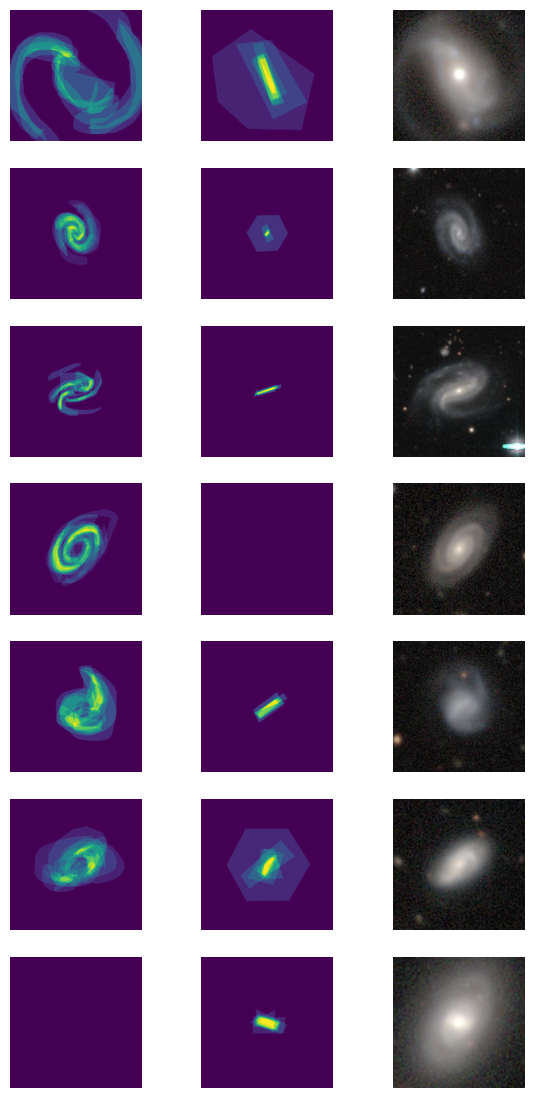

In [66]:
n_examples = 7

dataset = pytorch_dataset.SegmentationGalaxyDataset(df.sample(n_examples), transform=transform)

fig, rows = plt.subplots(ncols=3, nrows=n_examples, figsize=(7, 2*n_examples))


for galaxy_n in range(n_examples):

    (ax0, ax1, ax2) = rows[galaxy_n]

    outputs = dataset[galaxy_n]
   
    ax0.imshow(outputs['spiral_mask'])
    ax1.imshow(outputs['bar_mask'])
    ax2.imshow(outputs['image'])  # default target keyed as image
    ax0.axis('off')
    ax1.axis('off')
    ax2.axis('off')

plt.show()

## Check DataModule 

In [ ]:
transform = A.Compose(
    [
        A.CenterCrop(250, 250),
        ToTensorV2()
    ],
    additional_targets={'spiral_mask': 'image', 'bar_mask': 'image'}
)

In [ ]:
datamodule = pytorch_datamodule.SegmentationDataModule(
    train_catalog=df[:2],
    val_catalog=df[2:4],
    test_catalog=df[4:6],
    batch_size=2,
    num_workers=1,
    transform=transform
)
datamodule.setup('fit')

In [69]:
for batch in datamodule.train_dataloader():
    # print(len(batch))
    print(batch.keys())
    break

GZDESI/GZRings/GZCD not available from galaxy_datasets.pytorch.datasets - skipping
dict_keys(['image', 'spiral_mask', 'bar_mask'])
